In [55]:
# Dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise 1 Data preparation
## Q1.1 Load the dataset, inspect feature names and target distribution. Comment on dataset imbalance

In [56]:
# Q1.1 Loading the dataset and counting how many samples are malignant or benign

df = pd.read_csv("../Data/data.csv")

y = df.diagnosis

unique, counts = np.unique(y, return_counts=True)
print(unique, counts, (counts / len(y))*100)

['B' 'M'] [357 212] [62.74165202 37.25834798]


The dataset consists of 30 numeric values of features that describe the characteristics of tumors computed from images of breasts. These include mean values, error estimates and worst-case values, and they have information on the tumor size, shape and texture etc.

The dataset also consists of 569 samples with 30 features each. The target variable is whether the tumor is malignant or benign, where 63% of the dataset is benign and 37% is malignant. This means there is a slight imbalance towards the benign class, which should be considered when evaluating model performance.

## Q1.2 Analyzing all features with and without standardization and plotting them.

                               mean         std         min         max
radius_mean               14.127292    3.524049    6.981000    28.11000
texture_mean              19.289649    4.301036    9.710000    39.28000
perimeter_mean            91.969033   24.298981   43.790000   188.50000
area_mean                654.889104  351.914129  143.500000  2501.00000
smoothness_mean            0.096360    0.014064    0.052630     0.16340
compactness_mean           0.104341    0.052813    0.019380     0.34540
concavity_mean             0.088799    0.079720    0.000000     0.42680
concave points_mean        0.048919    0.038803    0.000000     0.20120
symmetry_mean              0.181162    0.027414    0.106000     0.30400
fractal_dimension_mean     0.062798    0.007060    0.049960     0.09744
radius_se                  0.405172    0.277313    0.111500     2.87300
texture_se                 1.216853    0.551648    0.360200     4.88500
perimeter_se               2.866059    2.021855    0.757000    2

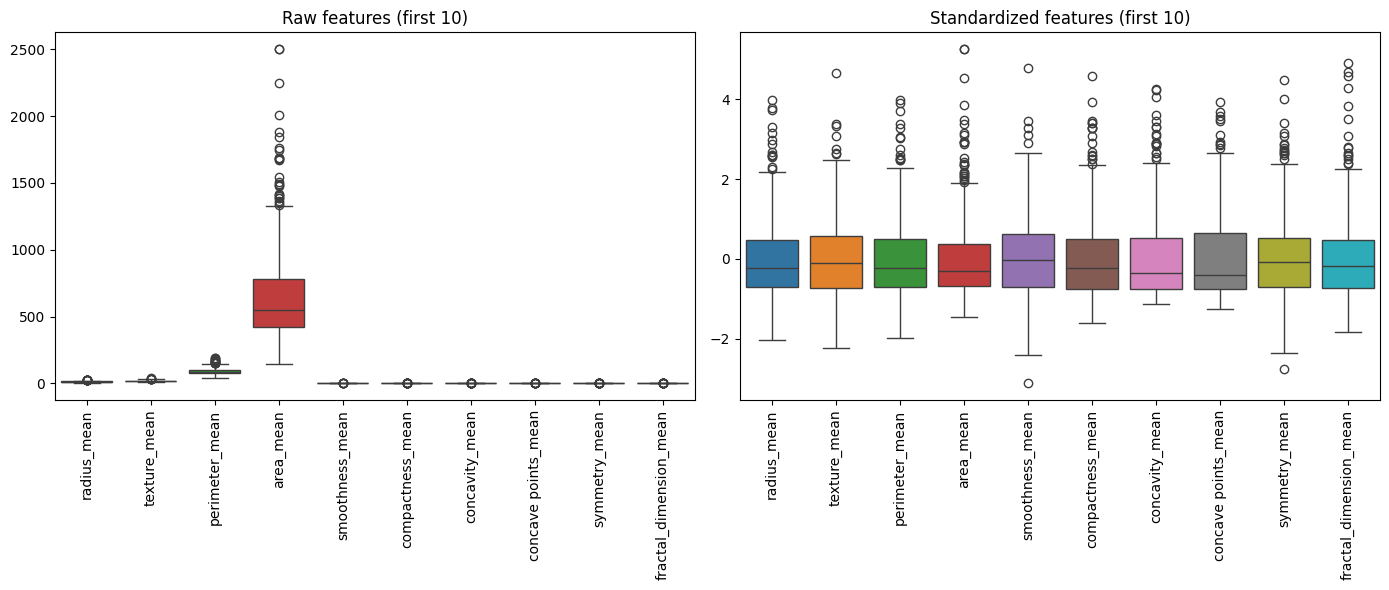

In [57]:
# Q1.2 Standardization

# Drop useless columns
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

print(df.describe().T[['mean','std','min','max']])

# Separate features and target
X = df.drop(columns=["diagnosis"])   # numeric features only
y = df["diagnosis"]                  # target (M/B)

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Plot first 10 features before and after scaling
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(data=X.iloc[:, :10])
plt.title("Raw features (first 10)")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=X_scaled.iloc[:, :10])
plt.title("Standardized features (first 10)")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Looking at the plots, we see that the features without standardization are wildly different in scale, while the features with standardization are much closer and more comparable. With standardization, we ensure that no single feature dominates due to its range, making standardized features more suitable, especially for algorithms that are sensitive to feature scaling.

## Q1.3 The importance of three way split with respect to hyperparameter search and robustness of any learned model